In [1548]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns




In [1549]:
#seabprn default parameters
sns.set(font='sans-serif')
sns.set_context('paper')

In [1550]:
#Obtain all .csv files required
sep = os.path.sep
resultsdir = sep.join(["..", "experiment-results", "analysis-ready"])
filelist = [resultsdir + sep + f for f in os.listdir(resultsdir) if f[-4:]=='.csv']
print(filelist)

['..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_01-05-20-0314.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_01-05-20-1028.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_02-05-20-0224 (1).csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_02-05-20-0637 (1).csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_02-05-20-0903.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_03-05-20-0628.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_03-05-20-1034.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_03-05-20-1147.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_29-04-20-0329.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_29-04-20-0621.csv', '..\\experiment-results\\analysis-ready\\experiment

In [1551]:
#Create dataframe from all experiment results
criterionList = ["BRANCH", "LINE", "WEAKMUTATION", "CBRANCH"]
full_intermediate_df = pd.concat([pd.read_csv(f) for f in filelist])
full_intermediate_df = full_intermediate_df.drop_duplicates()
#insert correctnes option
full_intermediate_df["correctness"] = (full_intermediate_df["success"] == True) & (full_intermediate_df["validpatch"] == True) 
full_intermediate_df["AVG_coverage"] = sum([full_intermediate_df[x + "_Coverage"] for x in criterionList]) / len(criterionList)

#create normal df with no intermediate patches
full_df = full_intermediate_df.loc[(full_intermediate_df["intermediate"]==False)]
full_df = full_df.astype({"speedup" : 'float64'})
full_df["correctness"] = (full_df["success"] == True) & (full_df["validpatch"] == True) & (full_df["speedup"] > -10)
full_df.info()
full_df.reset_index(drop=True, inplace=True)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 61 to 32550
Data columns (total 22 columns):
Index                    7260 non-null int64
TARGET_CLASS             7260 non-null object
criterion                7260 non-null object
Size                     7040 non-null float64
Length                   7260 non-null int64
Fitness                  7260 non-null float64
Total_Time               7260 non-null int64
evo_seed                 7040 non-null float64
BRANCH_Coverage          7260 non-null int64
LINE_Coverage            7260 non-null int64
WEAKMUTATION_Coverage    7260 non-null int64
CBRANCH_Coverage         7260 non-null int64
sampled                  7040 non-null object
gin_seed                 7040 non-null float64
patch                    7260 non-null object
validpatch               7260 non-null bool
success                  7260 non-null bool
avgtime                  7260 non-null object
speedup                  7260 non-null float64
intermediate           

In [1552]:
print(full_df["speedup"])

0        23.893042
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9        19.299410
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19       18.486217
20      -16.415926
21       27.962595
22        0.000000
23        0.000000
24       10.202429
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29       32.603980
           ...    
7230      0.000000
7231      1.582711
7232      0.000000
7233      0.000000
7234      0.000000
7235      0.000000
7236     -9.912890
7237     -9.611514
7238      0.000000
7239      0.000000
7240      9.538959
7241      0.000000
7242      0.000000
7243      0.799815
7244      0.000000
7245      0.000000
7246      0.000000
7247      0.000000
7248      0.000000
7249      3.655404
7250      0.000000
7251      0.

In [1553]:
#create subset of dataframes which only contains original tests generated by evoSuite (100% sampled)
auto_df = full_df[full_df["criterion"] != "MANUAL"]
#fulltest_df = auto_df[auto_df["index"] % 4 == 1] # For old dataset before sampled column created
fulltest_df = auto_df[auto_df["sampled"] == False]
fulltest_intermediate_df = full_intermediate_df[full_intermediate_df["sampled"]==False]
print(fulltest_df)

      Index             TARGET_CLASS criterion  Size  Length  Fitness  \
0         1     locogp.SortInsertion    BRANCH   4.0      15      0.0   
1         2     locogp.SortInsertion    BRANCH   4.0      15      0.0   
2         3     locogp.SortInsertion    BRANCH   4.0      15      0.0   
3         4     locogp.SortInsertion    BRANCH   4.0      15      0.0   
4         5     locogp.SortInsertion    BRANCH   4.0      15      0.0   
5         6     locogp.SortInsertion    BRANCH   4.0      15      0.0   
6         7     locogp.SortInsertion    BRANCH   4.0      15      0.0   
7         8     locogp.SortInsertion    BRANCH   4.0      15      0.0   
8         9     locogp.SortInsertion    BRANCH   4.0      15      0.0   
9        10     locogp.SortInsertion    BRANCH   4.0      15      0.0   
10       11     locogp.SortInsertion    BRANCH   4.0      15      0.0   
11       12     locogp.SortInsertion    BRANCH   4.0      15      0.0   
12       13     locogp.SortInsertion    BRANCH   4.

In [1554]:

fulltest_intermediate_df["criterion"]

0         BRANCH
1         BRANCH
4         BRANCH
5         BRANCH
6         BRANCH
7         BRANCH
8         BRANCH
16        BRANCH
17        BRANCH
18        BRANCH
23        BRANCH
24        BRANCH
27        BRANCH
34        BRANCH
35        BRANCH
37        BRANCH
56        BRANCH
57        BRANCH
60        BRANCH
61        BRANCH
64        BRANCH
65        BRANCH
67        BRANCH
108       BRANCH
109       BRANCH
111       BRANCH
156       BRANCH
157       BRANCH
158       BRANCH
198       BRANCH
          ...   
28226    CBRANCH
28227    CBRANCH
28237    CBRANCH
28270    CBRANCH
28271    CBRANCH
28292    CBRANCH
28317    CBRANCH
28318    CBRANCH
28320    CBRANCH
28354    CBRANCH
28355    CBRANCH
28362    CBRANCH
28394    CBRANCH
28395    CBRANCH
28400    CBRANCH
28436    CBRANCH
28437    CBRANCH
28445    CBRANCH
28470    CBRANCH
28471    CBRANCH
28479    CBRANCH
28511    CBRANCH
28512    CBRANCH
28513    CBRANCH
28553    CBRANCH
28554    CBRANCH
28575    CBRANCH
28600    CBRAN

## Research Question 1: How does each coverage metric affect the correctness of generated patches?

In [1555]:
#Now, we try the case where only patches which are generated are considered
valid_df = auto_df.loc[(auto_df['validpatch'] == True)]
#valid_fulltest_df= valid_df.loc[(valid_df["Index"] % 4 == 1)] for old dataset
valid_fulltest_df= valid_df.loc[(valid_df["sampled"] == False)]
valid_intermediate_fulltest_df = fulltest_intermediate_df.loc[(fulltest_intermediate_df['validpatch']==True)]

print(len(fulltest_df.index))
print(len(valid_fulltest_df.index))

print(137/960)

1760
381
0.14270833333333333


In [1556]:
totalCorrect = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==True)].index)
totalWrong = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==False)].index)
print(totalCorrect)
print(totalWrong)

98
283


In [1557]:
criterionList = ["BRANCH", "LINE","WEAKMUTATION", "CBRANCH"]
correctdict = dict()
correctdict["TOTAL"] = (totalCorrect, totalWrong)
for crit in criterionList:
    correct = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==True) & (valid_fulltest_df["criterion"] == crit)].index)
    wrong = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==False) & (valid_fulltest_df["criterion"] == crit)].index)
    correctdict[crit] = (correct, wrong)
print(correctdict)

{'TOTAL': (98, 283), 'BRANCH': (31, 66), 'LINE': (20, 75), 'WEAKMUTATION': (20, 68), 'CBRANCH': (27, 74)}


In [1558]:
criterionoverfitting_df = pd.DataFrame(correctdict)
validrowdict = {x : correctdict[x][0] + correctdict[x][1] for x in correctdict}
criterionoverfitting_df = criterionoverfitting_df.append(validrowdict, ignore_index=True)
criterionoverfitting_df["rowlabels"] = ["non-overfitting", "overfitting", "valid"]
criterionoverfitting_df = criterionoverfitting_df.set_index("rowlabels")
criterionoverfitting_df = criterionoverfitting_df.transpose()
criterionoverfitting_df["successrate"] = criterionoverfitting_df["non-overfitting"] /criterionoverfitting_df["valid"]

columnorder = ["valid", "non-overfitting", "overfitting", "successrate"]
criterionoverfitting_df = criterionoverfitting_df.reindex(columns = columnorder)
print(criterionoverfitting_df)

rowlabels     valid  non-overfitting  overfitting  successrate
TOTAL           381               98          283     0.257218
BRANCH           97               31           66     0.319588
LINE             95               20           75     0.210526
WEAKMUTATION     88               20           68     0.227273
CBRANCH         101               27           74     0.267327


{'TOTAL': (98, 283), 'BRANCH': (31, 66), 'LINE': (20, 75), 'WEAKMUTATION': (20, 68), 'CBRANCH': (27, 74)}


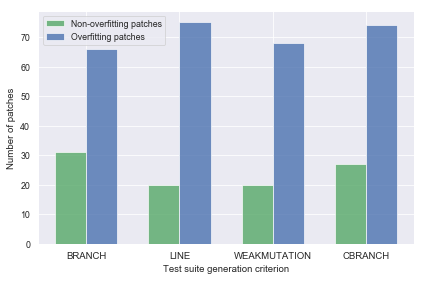

In [1559]:
#Plot bar graph using above data
fig, ax = plt.subplots()
n_groups = 4
bar_spacing = 1.5
index = np.arange(n_groups * bar_spacing, step=bar_spacing)
bar_width = 0.5
opacity = 0.8

correctbars = ax.bar(index, [x[0] for x in list(correctdict.values()) if correctdict["TOTAL"] is not x], bar_width, alpha=opacity, \
                      color='g', label="Non-overfitting patches")
wrongbars = ax.bar(index + bar_width, [x[1] for x in list(correctdict.values()) if correctdict["TOTAL"] is not x], bar_width, alpha=opacity, \
                   color='b', label="Overfitting patches")

plt.xticks((index + bar_width / 2), [label for label in list(correctdict.keys()) if label is not "TOTAL"], fontsize='medium')
#ax.set_yticks(np.arange(0, 100, 10), minor=True)
ax.grid(b=True, which='minor', color='w', linewidth=1.0)
ax.legend()

plt.ylabel("Number of patches")
plt.xlabel("Test suite generation criterion")
plt.tight_layout()
print(correctdict)
fig.savefig("q1BarValidCorrectness.png")

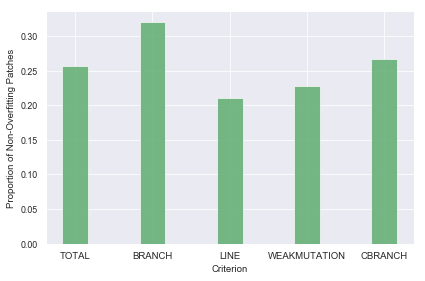

In [1560]:
fig, ax = plt.subplots()
n_groups = 5
bar_spacing = 1.5
index = np.arange(n_groups * bar_spacing, step=bar_spacing)
bar_width = 0.5
opacity = 0.8

propbars = ax.bar(index, [x for x in list(criterionoverfitting_df["successrate"])], bar_width, alpha=opacity,color='g')
                      

plt.xticks((index), correctdict.keys(), fontsize='medium')
#ax.set_yticks(np.arange(0, 100, 10), minor=True)
ax.grid(b=True, which='minor', color='w', linewidth=1.0)

plt.ylabel("Proportion of Non-Overfitting Patches")
plt.xlabel("Criterion")
plt.tight_layout()

fig.savefig("q1BarValidCorrectnessProportion.png")

{'BRANCH': 0.0007205920348114555, 'LINE': 0.0008217172866022114, 'WEAKMUTATION': 0.0005132699625675149, 'CBRANCH': -0.0006356956036523521}


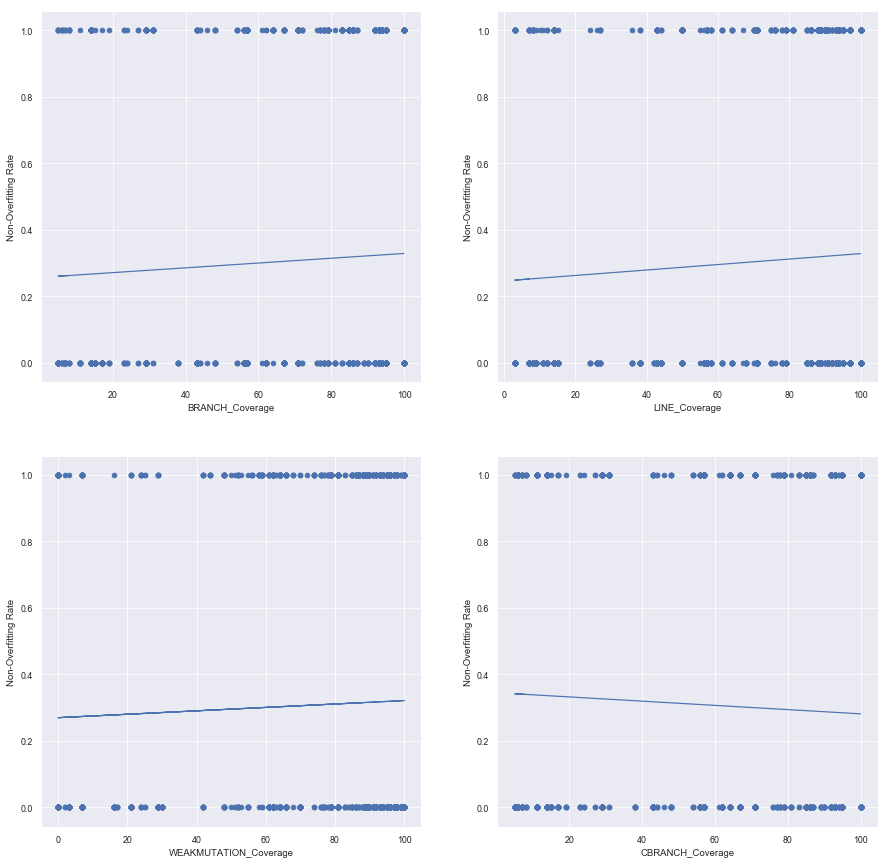

In [1561]:
#Data for Scatterplots - This series of scatterplots requires correctness as BOTH having a patch and it being correct
scatterplotGradientList = []
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]
for index in range(len(criterionList)):
    ax = axes[index]
    colname = criterionList[index] + "_Coverage"
    x_vals = valid_df[colname]
    y_vals = valid_df["correctness"]
    m, c = np.polyfit(x_vals, y_vals, 1)
    scatterplotGradientList.append(m)
    ax.scatter(x_vals, y_vals)
    ax.plot(x_vals, m * x_vals + c)
    ax.set_xlabel(colname)
    ax.set_ylabel("Non-Overfitting Rate")
scatterplotGradientDict = {criterionList[x] : scatterplotGradientList[x] for x in range(len(criterionList))}
print(scatterplotGradientDict)
fig.savefig("q1ScatterValidCorrectness.png")

## Analysis of intermediate patches

0.0010927288429498933
0.49024167295697013
0.0010839363513544336
0.48667252505114234
0.0009604527481096173
0.5006601651984016
-0.00016795034459642178
0.5680587505806478


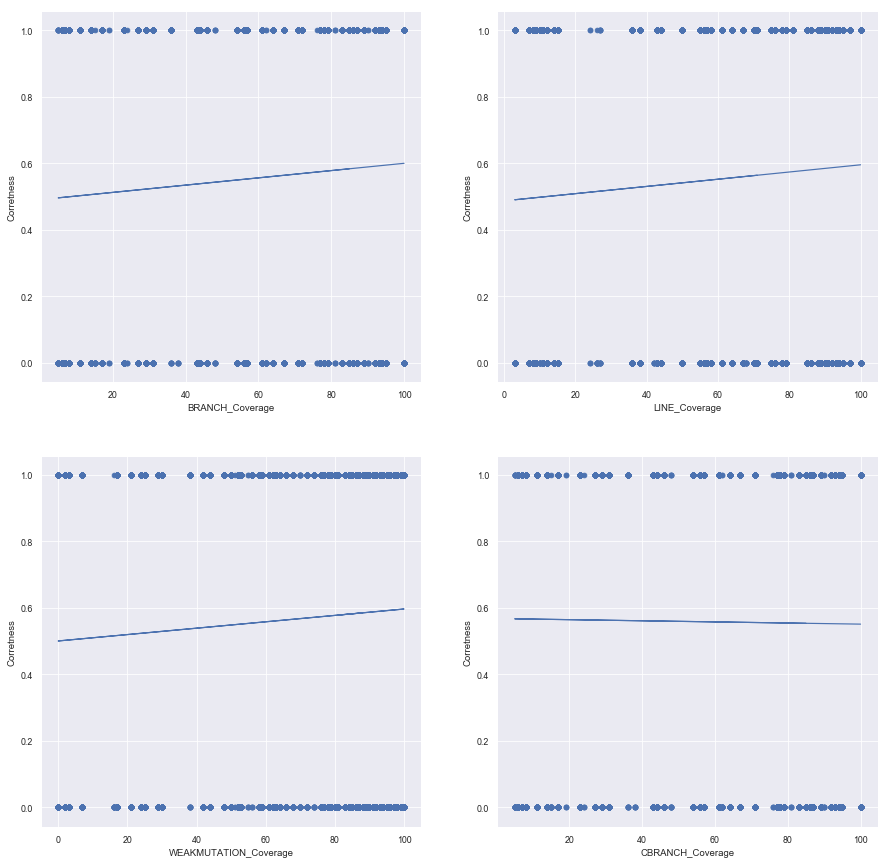

In [1562]:
#Data for Scatterplots - This series of scatterplots requires correctness as BOTH having a patch and it being correct. 
#This set of graphs is for intermediate 
valid_intermediate_df = full_intermediate_df.loc[(full_intermediate_df['validpatch'] == True)]
scatterplotCorrectDict = dict()
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]
for index in range(len(criterionList)):
    ax = axes[index]
    colname = criterionList[index] + "_Coverage"
    x_vals = valid_intermediate_df[colname]
    y_vals = valid_intermediate_df["correctness"]
    m, c = np.polyfit(x_vals, y_vals, 1)
    print(m)
    print(c)
    ax.scatter(x_vals, y_vals)
    ax.plot(x_vals, m * x_vals + c)
    ax.set_xlabel(colname)
    ax.set_ylabel("Corretness")
fig.savefig("q1ScatterIntermediateValidCorrectness.png")

In [1563]:
#Generate Tables to cound number of successful test suites (produced correct patch in 20 runs)
success_fulltest_df = valid_fulltest_df[valid_fulltest_df["correctness"]==True]
successpatchdict = {criterion : [22,0,0,0] for criterion in criterionList}
foundset = set()
for index, row in success_fulltest_df.iterrows():
    xid = (row["criterion"], row["evo_seed"], row["Total_Time"])
    if xid in foundset:
        continue
    else:
        foundset.add(xid)
    successpatchdict[row["criterion"]][2] += 1
    
foundset = set() #Reset foundset, now count valid tests
for index, row in valid_fulltest_df.iterrows():
    xid = (row["criterion"], row["evo_seed"], row["Total_Time"])
    if xid in foundset:
        continue
    else:
        foundset.add(xid)
    successpatchdict[row["criterion"]][1] += 1
    
for x in successpatchdict:
    successpatchdict[x][3] = successpatchdict[x][2] / successpatchdict[x][0]
    
successpatch_df = pd.DataFrame(successpatchdict)
successpatch_df["TOTAL"] = successpatch_df.sum(axis=1)
successpatch_df[""] = ["Total", "Valid", "Success", "Success Rate"] #row names
successpatch_df = successpatch_df.set_index("")
successpatch_df.at["Success Rate", "TOTAL"] = 123

successpatch_df.loc["Success Rate"] = successpatch_df.loc["Success"] / successpatch_df.loc["Total"]
print(successpatch_df)

                 BRANCH       LINE  WEAKMUTATION  CBRANCH      TOTAL
                                                                    
Total         22.000000  22.000000          22.0     22.0  88.000000
Valid         19.000000  21.000000          21.0     20.0  81.000000
Success       13.000000  13.000000          11.0     11.0  48.000000
Success Rate   0.590909   0.590909           0.5      0.5   0.545455


Analysis of data (pending confirmation of which set of data to use

## Research Question 2: How does the coverage metric of generated tests affect the performance of the generated patches?



In [1564]:
##In order to measure this, we plot a histogram for each coverage criterion and track the distribution of their speedups.
# We only consider test suites which produce patches. Considering patches which overfit is pointless.
correct_df = auto_df[auto_df["correctness"]==True]
correct_woutliers_df = correct_df[correct_df["speedup"] > 0]


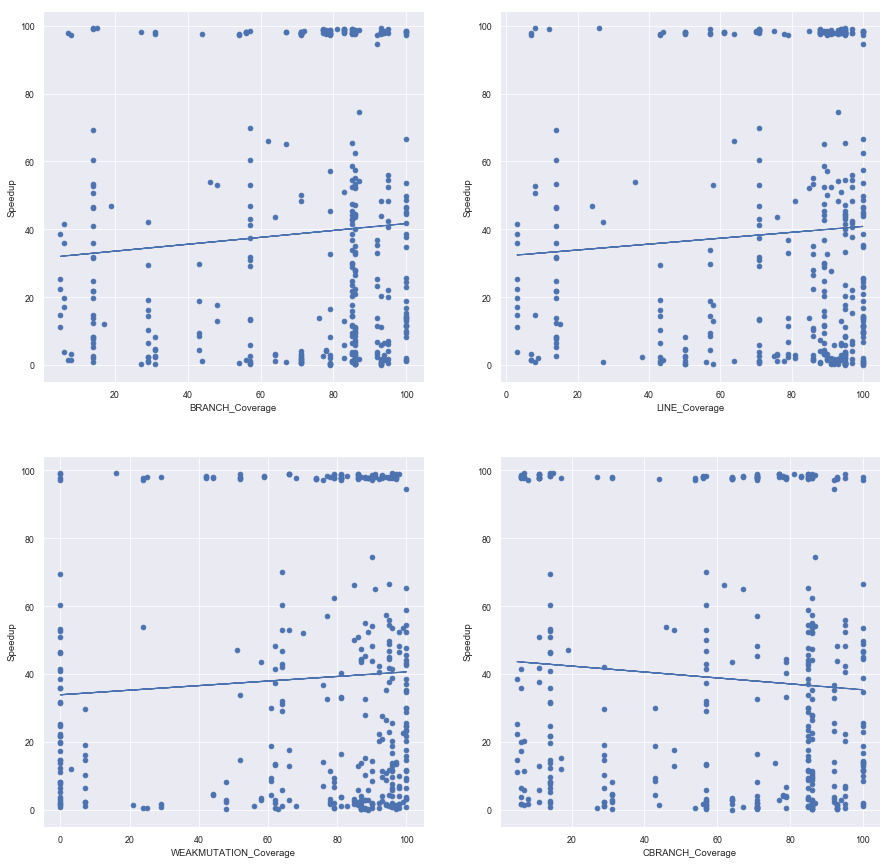

In [1565]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]
for index in range(len(criterionList)):
    ax = axes[index]
    colname = criterionList[index] + "_Coverage"
    x_vals = correct_woutliers_df[colname]
    y_vals = correct_woutliers_df["speedup"]
    m, c = np.polyfit(x_vals, y_vals, 1)
    ax.scatter(x_vals, y_vals)
    ax.plot(x_vals, m * x_vals + c)
    ax.set_xlabel(colname)
    ax.set_ylabel("Speedup")
fig.savefig("q2ScatterCorrectSpeedup.png")

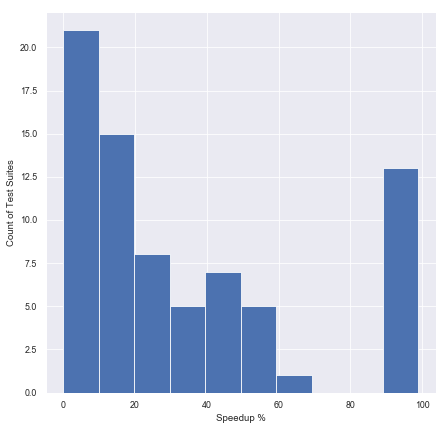

In [1566]:
fig , ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
correct_woutliers_df = correct_woutliers_df.loc[correct_woutliers_df["sampled"]==False]
y_vals = correct_woutliers_df["speedup"]
ax.hist(y_vals, 10)
ax.set_xlabel("Speedup %")
ax.set_ylabel("Count of Test Suites")

criterionstats = dict()
criterionstats["Total"] = (len(y_vals), np.mean(y_vals), np.std(y_vals))
yvals_list = [y_vals.copy()]

fig.savefig("q2HistAllSpeedup.png")

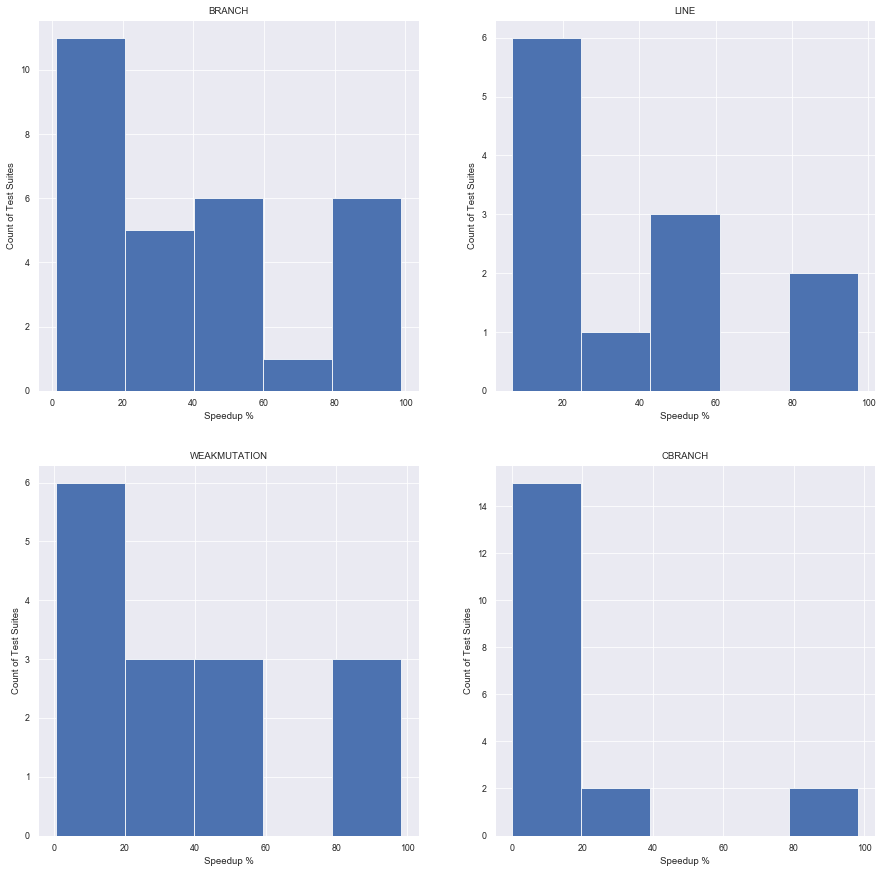

In [1567]:
## WE Need more patch data from this... will come when we change experimental setup
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]


for index in range(len(criterionList)):
    #Should we only use original, non-sampled tests here? Thoughts: we want to see how evosuite coverage criterion affects. Sampled tests are not in any way representative of real life tests, thus not useful.
    criterion_spec_df = correct_woutliers_df[(correct_woutliers_df["criterion"]==criterionList[index]) & (correct_woutliers_df["sampled"] == False)]
    ax = axes[index]
    y_vals = criterion_spec_df["speedup"]
    yvals_list.append(y_vals.copy())
    criterionstats[criterionList[index]] = (len(y_vals), np.mean(y_vals), np.std(y_vals))
    ax.hist(y_vals, 5)
    ax.set_title(criterionList[index])
    ax.set_xlabel("Speedup %")
    ax.set_ylabel("Count of Test Suites")
fig.savefig("q2HistCriterionSpeedup.png")

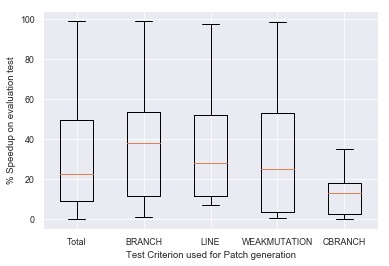

In [1568]:
fig , ax = plt.subplots()
ax.boxplot(yvals_list, labels=criterionstats.keys(), showfliers=False)
ax.set_ylabel("% Speedup on evaluation test")
ax.set_xlabel("Test Criterion used for Patch generation")
ax.set_label("Boxplot comparisons of speedup% by test generation criterion")
fig.savefig("q2BoxplotCriterionSpeedup.png")

In [1569]:
q2stats_df = pd.DataFrame(criterionstats)
q2stats_df["rows"] = ["Total Correct Count", "Mean Speedup", "Stddev"]
q2stats_df = q2stats_df.set_index("rows")
print(q2stats_df)


                         Total     BRANCH       LINE  WEAKMUTATION    CBRANCH
rows                                                                         
Total Correct Count  75.000000  29.000000  12.000000     15.000000  19.000000
Mean Speedup         34.358588  41.190964  38.502908     36.036174  19.988350
Stddev               33.448597  33.787609  30.345696     35.796554  28.104402


#### Some notes:
Scatterplot distribution above is interesting. Seems to suggest a few things:

Firstly, tests congregate around the high and lower values, there are few tests in the middle of the coverage spectrum. Given the way we vary coverage, could it be the way that evosuite generates tests - one test that has high coverage of most features and other tests to test smaller features? or something like that that the data seems to suggest

Secondly, the negative gradient seems to suggest that as coverage from the automated test suite increases, the total speedup accrued by GIN falls among "Correct" patches even. This could be due to the following : Automated tests being too restrictive? Restricting the behaviour of the program in ways that the developer did not intend. For example, a sorting program which tests a sort program may cover the entire codebase, but not actually test for required functionality (take an evosuite test which tests the sorting function on an already sorted list, or sorts a list, but compares the results using "AssertSame" which checks that they are merely the same object reference. These tests achieve high coverage but fail to actually capture the required behaviour of the program.


In [1570]:
manual_df = full_df[full_df["criterion"] == "MANUAL"]
valid_manual_df = manual_df[manual_df["validpatch"] == True]
manual_intermediate_df = full_intermediate_df[full_intermediate_df["criterion"] == "MANUAL"]
valid_intermediate_manual_df = manual_intermediate_df[manual_intermediate_df["validpatch"] == True]


In [1571]:
autoCorrect = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==True)].index)
autoWrong = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==False)].index)
print(autoCorrect)
print(autoWrong)
autoSuccess = len(fulltest_df.loc[(fulltest_df["correctness"]==True)].index)
autoFail = len(fulltest_df.loc[(fulltest_df["correctness"]==False)].index)
print(autoSuccess)
print(autoFail)
manualCorrect = len(valid_manual_df.loc[(valid_manual_df["correctness"]==True)].index)
manualWrong = len(valid_manual_df.loc[(valid_manual_df["correctness"]==False)].index)
print(manualCorrect)
print(manualWrong)
manualSuccess = len(manual_df.loc[(manual_df["correctness"]==True)].index)
manualFail = len(manual_df.loc[(manual_df["correctness"]==False)].index)
print(manualSuccess)
print(manualFail)

autoIntCorrect = len(valid_intermediate_fulltest_df.loc[(valid_intermediate_fulltest_df["correctness"]==True)].index)
autoIntWrong = len(valid_intermediate_fulltest_df.loc[(valid_intermediate_fulltest_df["correctness"]==False)].index)
print(autoIntCorrect)
print(autoIntWrong)
manualIntCorrect = len(valid_intermediate_manual_df.loc[(valid_intermediate_manual_df["correctness"]==True)].index)
manualIntWrong = len(valid_intermediate_manual_df.loc[(valid_intermediate_manual_df["correctness"]==False)].index)
print(manualIntCorrect)
print(manualIntWrong)

correctdict = dict()
correctdict["EvoSuite"] = (autoCorrect, autoWrong)
correctdict["Manual"] = (manualCorrect, manualWrong)

98
283
98
1662
34
6
34
186
3053
2599
437
2


{'EvoSuite': (98, 283), 'Manual': (34, 6)}


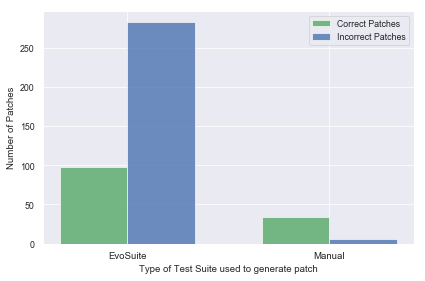

In [1572]:
#Plot bar graph using above data THIS IS comparing correctness i.e Ability to generate + correct patches
fig, ax = plt.subplots()
n_groups = 2
bar_spacing = 1.5
index = np.arange(n_groups * bar_spacing, step=bar_spacing)
bar_width = 0.5
opacity = 0.8

correctbars = ax.bar(index, [x[0] for x in list(correctdict.values())], bar_width, alpha=opacity, \
                      color='g', label="Correct Patches")
wrongbars = ax.bar(index + bar_width, [x[1] for x in list(correctdict.values())], bar_width, alpha=opacity, \
                   color='b', label="Incorrect Patches")

plt.xticks((index + bar_width / 2), correctdict.keys(), fontsize='medium')
#ax.set_yticks(np.arange(0, 100, 10), minor=True)
ax.grid(b=True, which='minor', color='w', linewidth=1.0)
ax.legend()

plt.ylabel("Number of Patches")
plt.xlabel("Type of Test Suite used to generate patch")
plt.tight_layout()
print(correctdict)
fig.savefig("q3BarManualVsAutoCorrectness.png")

In [1573]:
valid_manual_df["speedup"]

641       4.651689
642      -1.204850
646       9.207785
647       4.862214
649       1.882534
650       6.633916
651      -7.940985
653      -1.871837
654       0.538719
657     -13.011066
658       1.042389
659       6.292092
1307      2.495592
2629      2.252370
2635      0.646482
3282     -4.286749
3285     71.033226
3942     -9.110801
3957     -4.916297
4600     13.762733
4601     -0.623250
4603      0.069419
4606    -12.329645
4614     -5.795810
4615     22.910057
4619    -11.621730
5260     -1.932748
5263     -3.305348
5271     -1.673806
5272     -4.853399
5276     -8.166308
5279      0.167857
6582     10.012580
6583    -13.812508
6589   -282.800230
7240      9.538959
7243      0.799815
7249      3.655404
7254   -247.768950
7255      0.525761
Name: speedup, dtype: float64

In [1574]:
manual_correct_woutliers_df = valid_manual_df.loc[(valid_manual_df["correctness"] == True) & (valid_manual_df["speedup"] >= 0) ]

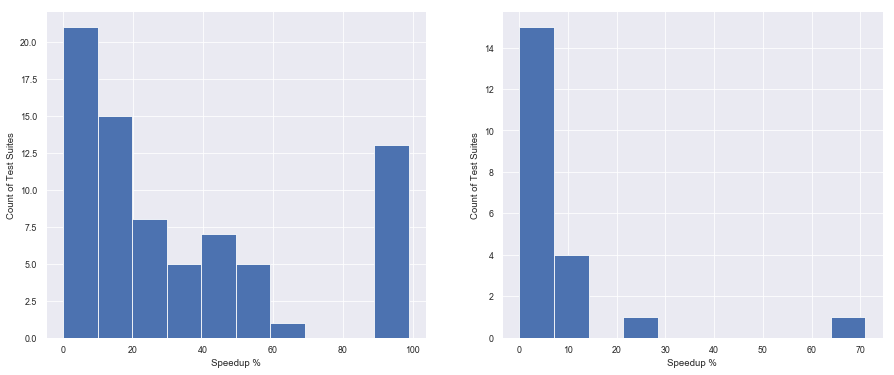

In [1575]:
fig , (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)

a_y_vals = correct_woutliers_df["speedup"]
ax1.hist(a_y_vals, 10)
ax1.set_label("Automatically Generated Test Suites")
ax1.set_xlabel("Speedup %")
ax1.set_ylabel("Count of Test Suites")

m_y_vals = manual_correct_woutliers_df["speedup"]
ax2.hist(m_y_vals, 10)
ax2.set_xlabel("Speedup %")
ax2.set_ylabel("Count of Test Suites")
ax1.set_label("Manual Test Suites")

fig.savefig("q3HistManualVsAutoSpeedup.png")

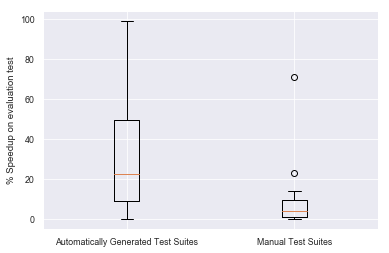

In [1576]:
fig, ax = plt.subplots()
ax.boxplot([a_y_vals, m_y_vals], labels=["Automatically Generated Test Suites", "Manual Test Suites" ])
ax.set_ylabel("% Speedup on evaluation test")
ax.set_label("Boxplot comparisons of speedup% by type of test suite")
fig.savefig("q3BoxplotAutoManualSpeedup.png")

In [1577]:
#Calculation of average coverage between tests

man_cov_mean = np.mean(manual_correct_woutliers_df["AVG_coverage"])
auto_cov_mean = np.mean(correct_woutliers_df["AVG_coverage"])

print(man_cov_mean, auto_cov_mean)

87.32142857142857 91.19


## RQ4 Functional Overfitting in Manual vs Automated Tests

In [1578]:
negSpeedupAuto_df = valid_fulltest_df.loc[(valid_df["speedup"] < 0)]# & (valid_fulltest_df["success"] == True)]
criterionList = ["BRANCH", "LINE", "WEAKMUTATION", "CBRANCH"]

total_overfit = len(negSpeedupAuto_df.index)
total_non_overfit = len(valid_fulltest_df.loc[(valid_fulltest_df["speedup"] >= 0)].index)
overfitdict = dict()
overfitdict["TOTAL"] = (total_overfit, total_non_overfit)
for x in criterionList:
    overfit = len(negSpeedupAuto_df.loc[(negSpeedupAuto_df["criterion"] == x)].index)
    non_overfit = len(valid_fulltest_df.loc[(valid_fulltest_df["speedup"] >= 0) & (valid_fulltest_df["criterion"] == x)].index)
    overfitdict[x] = (overfit, non_overfit)
print(overfitdict)

{'TOTAL': (196, 185), 'BRANCH': (40, 57), 'LINE': (57, 38), 'WEAKMUTATION': (47, 41), 'CBRANCH': (52, 49)}


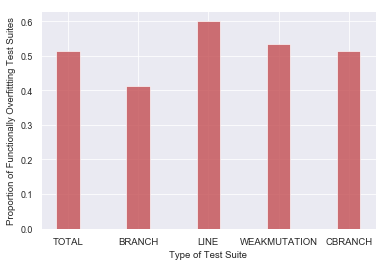

In [1579]:
#Plot bar graph using above data
fig, ax = plt.subplots()
n_groups = 5
bar_spacing = 1.5
index = np.arange(n_groups * bar_spacing, step=bar_spacing)
bar_width = 0.5
opacity = 0.8


propbars = ax.bar(index, [x[0] /(x[1] + x[0]) for x in list(overfitdict.values())], bar_width, alpha=opacity, \
                      color='r')
#wrongbars = ax.bar(index + bar_width, [x[1] for x in list(overfitdict.values())], bar_width, alpha=opacity, \
                   #color='b', label="Functionally Non-Overfitting Test Suites")

plt.xticks((index), overfitdict.keys(), fontsize='medium')
#ax.set_yticks(np.arange(0, 100, 10), minor=True)
ax.grid(b=True, which='minor', color='w', linewidth=1.0)
#ax.legend()

plt.ylabel("Proportion of Functionally Overfittting Test Suites")
plt.xlabel("Type of Test Suite")
#plt.tight_layout()
fig.savefig("q4BarFunctionalOverfittingProportion")

In [1580]:
#Combined Overfitting Proportion

In [1581]:
combined_overfitting_df = valid_fulltest_df.loc[(valid_fulltest_df["success"] == False) | (valid_fulltest_df["speedup"] < 0)]
criterionList = ["BRANCH", "LINE", "WEAKMUTATION", "CBRANCH"]

total_overfit = len(combined_overfitting_df.index)
total_non_overfit = len(valid_fulltest_df.index) - len(combined_overfitting_df.index)
combined_overfitdict = dict()
combined_overfitdict["TOTAL"] = (total_overfit, total_non_overfit)
for x in criterionList:
    overfit = len(combined_overfitting_df.loc[(combined_overfitting_df["criterion"] == x)].index)
    non_overfit = len(valid_fulltest_df.loc[valid_fulltest_df["criterion"]== x].index) - overfit
    combined_overfitdict[x] = (overfit, non_overfit)
print(combined_overfitdict)

#These stats show us the complete proportion of tests which overfit to trainign suite both functionally and non-functionally

{'TOTAL': (306, 75), 'BRANCH': (68, 29), 'LINE': (83, 12), 'WEAKMUTATION': (73, 15), 'CBRANCH': (82, 19)}


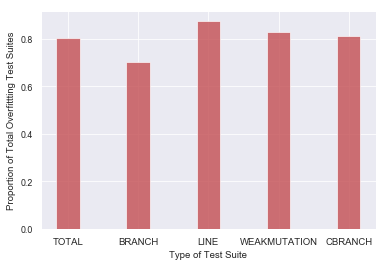

In [1582]:
#Plot bar graph using above data
fig, ax = plt.subplots()
n_groups = 5
bar_spacing = 1.5
index = np.arange(n_groups * bar_spacing, step=bar_spacing)
bar_width = 0.5
opacity = 0.8


propbars = ax.bar(index, [x[0] /(x[1] + x[0]) for x in list(combined_overfitdict.values())], bar_width, alpha=opacity, \
                      color='r')
#wrongbars = ax.bar(index + bar_width, [x[1] for x in list(combined_overfitdict.values())], bar_width, alpha=opacity, \
                   #color='b', label="Functionally Non-Overfitting Test Suites")

plt.xticks((index), combined_overfitdict.keys(), fontsize='medium')
#ax.set_yticks(np.arange(0, 100, 10), minor=True)
ax.grid(b=True, which='minor', color='w', linewidth=1.0)
#ax.legend()

plt.ylabel("Proportion of Total Overfittting Test Suites")
plt.xlabel("Type of Test Suite")
#plt.tight_layout()
fig.savefig("q4BarTotalOverfittingProportion")